In [1]:
!pip install eli5

     |████████████████████████████████| 112kB 8.5MB/s 


In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import seaborn as sns
sns.set()

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered.csv')
test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [3]:
from itertools import islice

def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return

a = X_train
new_X_train = []
for i in range(len(X_train)):
  means = list(means_of_slices(a[i], 20))
  new_X_train.append(means)
X_train = np.array(new_X_train)
# X_train = []
# for i in new_X_train:
#   X_train.append(np.repeat(i,17))
# X_train = np.array(X_train)
# print(X_train.shape)

b = X_test
new_X_test = []
for i in range(len(X_test)):
  means = list(means_of_slices(b[i], 20))
  new_X_test.append(means)
X_test = np.array(new_X_test)
# X_test = []
# for i in new_X_test:
#   X_test.append(np.repeat(i,17))
# X_test = np.array(X_test)
# print(X_test.shape)

In [4]:
from sklearn.metrics import *
def showResults(test, pred, model_name):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='weighted')
    recall = recall_score(test, pred, average = 'weighted')
    f1score= f1_score(test, pred, average='weighted') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score : {}".format(f1score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)
    return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

In [5]:
# using gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100,random_state=48, n_iter_no_change=5,tol=0.1)
gbc_clf.fit(X_train, y_train)
print('Gradient Boosting Results')
y_pred_gbc = gbc_clf.predict(X_test)
print(gbc_clf.score(X_test,y_test))

# using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=48)
ada_clf.fit(X_train, y_train)
print('Ada Boosting Results')
y_pred_ada = ada_clf.predict(X_test)
print(ada_clf.score(X_test,y_test))

# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(max_depth=10, random_state=48,n_estimators=10)
rfc_clf.fit(X_train, y_train)
print('Random Forest Results')
y_pred_rfc = rfc_clf.predict(X_test)
print(rfc_clf.score(X_test, y_test))

# using naive bayes
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print('Naive Bayes Results')
y_pred_NB = NB_clf.predict(X_test)
print(NB_clf.score(X_test, y_test))

# using NN Multi Layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
NNMLP_clf = MLPClassifier(random_state=48, max_iter=100)
NNMLP_clf.fit(X_train, y_train)
print('NNMLP Results')
y_pred_NNMLP = NNMLP_clf.predict(X_test)
print(NNMLP_clf.score(X_test, y_test))

#support vector classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
print('Support Vector Results')
y_pred_svc = svc_clf.predict(X_test)
print(svc_clf.score(X_test,y_test))

Gradient Boosting Results
0.8533132609671711
Ada Boosting Results
0.33655547632253124
Random Forest Results
0.8667300530861263
Naive Bayes Results
0.35612603333069226


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NNMLP Results
0.8925071969997095
Support Vector Results
0.8899189182051079


In [6]:
##Use only when running on all data
gbc_results = showResults(y_test, y_pred_gbc,'GBC')
ada_results = showResults(y_test, y_pred_ada,'ADA')
rfc_results = showResults(y_test, y_pred_rfc,'RFC')
nb_results = showResults(y_test, y_pred_NB,'NB')
nnmlp_results = showResults(y_test, y_pred_NNMLP,'NNMLP')
svc_results = showResults(y_test, y_pred_svc,'SVC')

Accuracy  : 0.8533132609671711
Precision : 0.9349508491098792
Recall : 0.8533132609671711
f1score : 0.8816719907848594
[[23768   211   470   588  1725  1212   725     4]
 [    4  1627     1    13     2     1    12     0]
 [   60     1  2343     7    63     1    21     4]
 [   52    18    13  1018    28    45    22     3]
 [   92     1    16     6   641     2    15     0]
 [   13     0     1    12     2   164     1     0]
 [   12     4     3    11     0     2   379    17]
 [    1     0     2    11     2     0    22  2369]]
Accuracy  : 0.33655547632253124
Precision : 0.8118281057580186
Recall : 0.33655547632253124
f1score : 0.4141173018754133
[[7933 1515 7312  462 6756 2664 2048   13]
 [  27  687  701   15   44  178    8    0]
 [ 245    4 1663    9  502    7   59   11]
 [  81  282   96  264  181   51  210   34]
 [  75   12   99    8  495   16   68    0]
 [  16   11   38   26    2   93    6    1]
 [  17    5   97   30   31   26  203   19]
 [   0    3   12    7    3    1  976 1405]]
Accura

In [7]:
# sklearn_results = pd.DataFrame(data=(gbc_results,ada_results,rfc_results,
#                                      nb_results,nnmlp_results,svc_results),
#                                index=('Model','Accuracy','Precision','Recall','F1score','CM'))
# print(sklearn_results)
# sklearn_results.to_csv('sklearn_results.csv', encoding='utf-8', index=False)

In [8]:
misclass_gbc = np.where(y_pred_gbc!=y_test)
misclass_gbc = misclass_gbc[0].tolist()
print(misclass_gbc)

correct_gbc = np.where(y_pred_gbc==y_test)
correct_gbc = correct_gbc[0].tolist()
print(correct_gbc)

[13, 15, 17, 19, 22, 26, 38, 47, 61, 74, 78, 99, 106, 107, 115, 118, 127, 133, 136, 139, 144, 146, 155, 158, 162, 163, 164, 165, 166, 171, 176, 180, 181, 185, 187, 189, 191, 213, 219, 221, 225, 226, 229, 232, 237, 261, 266, 267, 279, 281, 285, 296, 304, 324, 333, 335, 337, 342, 343, 345, 349, 364, 366, 376, 380, 384, 385, 386, 391, 416, 418, 424, 430, 434, 436, 441, 449, 453, 454, 457, 460, 462, 466, 468, 471, 484, 489, 492, 506, 519, 525, 528, 534, 543, 563, 573, 575, 578, 582, 583, 585, 586, 591, 599, 607, 631, 646, 651, 653, 657, 664, 668, 671, 689, 694, 695, 712, 721, 739, 751, 752, 758, 760, 780, 784, 793, 796, 800, 802, 803, 804, 820, 829, 832, 834, 841, 845, 852, 855, 856, 860, 863, 865, 871, 872, 874, 881, 893, 900, 902, 911, 912, 928, 929, 930, 941, 949, 956, 965, 969, 987, 989, 990, 991, 996, 1005, 1008, 1014, 1016, 1021, 1026, 1032, 1036, 1046, 1048, 1055, 1060, 1062, 1063, 1066, 1082, 1098, 1106, 1116, 1118, 1119, 1124, 1127, 1128, 1130, 1132, 1141, 1144, 1156, 1157, 1161, 

In [33]:
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

perm_gbc = PermutationImportance(gbc_clf).fit(X_test, y_test)
print('GBC Results')
exp_gbc = eli5.explain_weights_df(perm_gbc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

GBC Results


In [32]:
perm_gbc = PermutationImportance(gbc_clf).fit(X_test[correct_gbc[:]], y_test[correct_gbc[:]])
print('GBC Correct Results')
exp_gbc_corr = eli5.explain_weights_df(perm_gbc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

GBC Correct Results


In [10]:
perm_gbc = PermutationImportance(gbc_clf).fit(X_test[misclass_gbc[:]], y_test[misclass_gbc[:]])
print('GBC Misclass Results')
exp_gbc_mis = eli5.explain_weights_df(perm_gbc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

GBC Misclass Results


In [11]:
misclass_ada = np.where(y_pred_ada!=y_test)
misclass_ada = misclass_ada[0].tolist()
print(misclass_ada)

correct_ada = np.where(y_pred_ada==y_test)
correct_ada = correct_ada[0].tolist()
print(correct_ada)

[6, 7, 9, 11, 12, 13, 14, 17, 19, 20, 22, 23, 24, 26, 27, 28, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 47, 51, 52, 55, 57, 58, 59, 60, 61, 63, 64, 65, 68, 69, 70, 74, 75, 78, 79, 81, 82, 83, 85, 86, 89, 90, 91, 93, 98, 99, 102, 103, 106, 107, 108, 109, 110, 113, 115, 117, 118, 120, 121, 123, 124, 128, 129, 132, 133, 134, 136, 139, 141, 142, 143, 144, 145, 147, 150, 151, 152, 155, 156, 157, 158, 160, 162, 165, 166, 167, 169, 170, 171, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 186, 187, 189, 190, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 205, 206, 207, 208, 213, 214, 215, 216, 217, 220, 221, 222, 223, 226, 227, 229, 231, 232, 233, 234, 236, 237, 238, 243, 244, 247, 249, 251, 252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274, 276, 277, 278, 279, 280, 282, 283, 287, 288, 290, 291, 292, 296, 299, 300, 302, 303, 304, 306, 307, 309, 310, 311, 312, 314, 317, 319, 320, 322, 323, 324, 325, 326, 327, 329, 330, 333, 334, 335, 337

In [34]:
perm_ada = PermutationImportance(ada_clf).fit(X_test, y_test)
print('ADA Results')
exp_ada = eli5.explain_weights_df(perm_ada, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

ADA Results


In [12]:
perm_ada = PermutationImportance(ada_clf).fit(X_test[correct_ada[:]], y_test[correct_ada[:]])
print('ADA Correct Results')
exp_ada_corr = eli5.explain_weights_df(perm_ada, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

ADA Correct Results


In [13]:
perm_ada = PermutationImportance(ada_clf).fit(X_test[misclass_ada[:]], y_test[misclass_ada[:]])
print('ADA Misclass Results')
exp_ada_mis = eli5.explain_weights_df(perm_ada, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

ADA Misclass Results


In [14]:
misclass_rfc = np.where(y_pred_rfc!=y_test)
misclass_rfc = misclass_rfc[0].tolist()
print(misclass_rfc)

correct_rfc = np.where(y_pred_rfc==y_test)
correct_rfc = correct_rfc[0].tolist()
print(correct_rfc)

[11, 12, 13, 17, 26, 38, 47, 70, 78, 103, 106, 107, 115, 124, 133, 139, 144, 145, 146, 156, 162, 164, 165, 166, 171, 175, 181, 185, 187, 194, 219, 225, 230, 253, 261, 266, 267, 276, 277, 279, 281, 285, 304, 309, 319, 324, 333, 337, 343, 345, 370, 371, 376, 385, 386, 400, 404, 406, 418, 430, 449, 453, 460, 462, 466, 481, 494, 506, 528, 530, 533, 550, 551, 563, 575, 578, 580, 583, 591, 596, 599, 601, 637, 646, 653, 657, 671, 686, 695, 712, 739, 751, 752, 753, 760, 780, 783, 784, 793, 802, 803, 804, 806, 832, 841, 845, 852, 855, 856, 864, 865, 866, 871, 874, 881, 902, 906, 909, 911, 928, 938, 941, 949, 953, 965, 969, 987, 989, 990, 996, 1005, 1014, 1016, 1022, 1026, 1036, 1045, 1049, 1055, 1060, 1062, 1066, 1083, 1098, 1107, 1112, 1116, 1118, 1119, 1121, 1127, 1128, 1130, 1144, 1157, 1169, 1181, 1187, 1188, 1194, 1201, 1213, 1225, 1228, 1232, 1234, 1238, 1253, 1257, 1258, 1259, 1262, 1267, 1282, 1290, 1296, 1301, 1308, 1330, 1353, 1354, 1393, 1397, 1404, 1405, 1410, 1441, 1447, 1464, 1469

In [35]:
perm_rfc = PermutationImportance(rfc_clf).fit(X_test, y_test)
print('RFC Results')
exp_rfc = eli5.explain_weights_df(perm_rfc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

RFC Results


In [15]:
perm_rfc =PermutationImportance(rfc_clf).fit(X_test[correct_rfc[:]], y_test[correct_rfc[:]])
print('RFC Correct Results')
exp_rfc_corr = eli5.explain_weights_df(perm_rfc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

RFC Correct Results


In [16]:
perm_rfc =PermutationImportance(rfc_clf).fit(X_test[misclass_rfc[:]], y_test[misclass_rfc[:]])
print('RFC Misclass Results')
exp_rfc_mis = eli5.explain_weights_df(perm_rfc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

RFC Misclass Results


In [17]:
misclass_nb = np.where(y_pred_NB!=y_test)
misclass_nb = misclass_nb[0].tolist()
print(misclass_nb)

correct_nb = np.where(y_pred_NB==y_test)
correct_nb = correct_nb[0].tolist()
print(correct_nb)

[1, 2, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 24, 26, 27, 29, 30, 33, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 62, 65, 67, 68, 69, 70, 71, 72, 73, 74, 78, 80, 82, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 101, 102, 103, 104, 106, 107, 109, 110, 112, 114, 115, 116, 118, 119, 120, 121, 124, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 155, 156, 158, 159, 161, 163, 164, 165, 166, 167, 168, 170, 174, 175, 176, 177, 179, 181, 182, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 202, 207, 208, 210, 211, 213, 214, 216, 219, 220, 221, 222, 224, 225, 226, 227, 229, 230, 231, 232, 233, 236, 237, 238, 239, 240, 242, 243, 246, 247, 248, 250, 251, 252, 254, 258, 261, 262, 265, 266, 267, 268, 269, 271, 272, 273, 274, 276, 277, 279, 280, 283, 285, 286, 287, 288, 289, 290, 291, 293, 295, 296, 297, 300, 301, 302, 304, 306, 307, 308, 311, 312, 313, 314, 315, 317, 318,

In [36]:
perm_nb = PermutationImportance(NB_clf).fit(X_test, y_test)
print('NB Results')
exp_nb = eli5.explain_weights_df(perm_nb, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NB Results


In [18]:
perm_nb =PermutationImportance(NB_clf).fit(X_test[correct_nb[:]], y_test[correct_nb[:]])
print('NB Correct Results')
exp_nb_corr = eli5.explain_weights_df(perm_nb, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NB Correct Results


In [19]:
perm_nb =PermutationImportance(NB_clf).fit(X_test[misclass_nb[:]], y_test[misclass_nb[:]])
print('NB Misclass Results')
exp_nb_mis = eli5.explain_weights_df(perm_nb, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NB Misclass Results


In [20]:
misclass_nnmlp = np.where(y_pred_NNMLP!=y_test)
misclass_nnmlp = misclass_nnmlp[0].tolist()
print(misclass_nnmlp)

correct_nnmlp = np.where(y_pred_NNMLP==y_test)
correct_nnmlp = correct_nnmlp[0].tolist()
print(correct_nnmlp)

[17, 26, 28, 47, 78, 103, 106, 107, 110, 128, 165, 171, 176, 180, 181, 185, 186, 189, 215, 219, 255, 259, 261, 266, 276, 279, 281, 285, 324, 333, 337, 345, 349, 385, 386, 391, 392, 400, 416, 423, 428, 430, 432, 439, 441, 453, 454, 484, 494, 500, 506, 538, 543, 551, 573, 578, 591, 598, 599, 604, 608, 627, 651, 653, 664, 667, 668, 671, 693, 694, 697, 715, 752, 760, 780, 793, 800, 801, 807, 819, 831, 832, 841, 845, 846, 855, 860, 863, 865, 871, 874, 881, 888, 894, 899, 900, 911, 912, 918, 929, 941, 949, 965, 969, 970, 975, 990, 996, 1005, 1026, 1032, 1036, 1048, 1055, 1060, 1062, 1063, 1066, 1071, 1075, 1083, 1098, 1106, 1118, 1119, 1127, 1130, 1144, 1156, 1162, 1185, 1188, 1194, 1200, 1201, 1209, 1221, 1225, 1228, 1232, 1234, 1238, 1258, 1262, 1267, 1270, 1277, 1282, 1291, 1296, 1301, 1321, 1344, 1351, 1369, 1379, 1387, 1394, 1397, 1400, 1441, 1445, 1447, 1472, 1480, 1494, 1507, 1510, 1513, 1525, 1534, 1535, 1550, 1551, 1555, 1556, 1567, 1577, 1602, 1608, 1612, 1620, 1621, 1633, 1664, 16

In [37]:
perm_nnmlp = PermutationImportance(NNMLP_clf).fit(X_test, y_test)
print('NNMLP Results')
exp_nnmlp = eli5.explain_weights_df(perm_nnmlp, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NNMLP Results


In [21]:
perm_nnmlp =PermutationImportance(NNMLP_clf).fit(X_test[correct_nnmlp[:]], y_test[correct_nnmlp[:]])
print('NNMLP Correct Results')
exp_nnmlp_corr = eli5.explain_weights_df(perm_nnmlp, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NNMLP Correct Results


In [22]:
perm_nnmlp =PermutationImportance(NNMLP_clf).fit(X_test[misclass_nnmlp[:]], y_test[misclass_nnmlp[:]])
print('NNMLP Misclass Results')
exp_nnmlp_mis = eli5.explain_weights_df(perm_nnmlp, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NNMLP Misclass Results


In [23]:
misclass_svc = np.where(y_pred_svc!=y_test)
misclass_svc = misclass_svc[0].tolist()
print(misclass_svc)

correct_svc = np.where(y_pred_svc==y_test)
correct_svc = correct_svc[0].tolist()
print(correct_svc)

[17, 22, 26, 38, 45, 47, 51, 61, 63, 78, 90, 103, 106, 107, 128, 158, 163, 165, 166, 171, 176, 181, 189, 190, 206, 213, 215, 255, 261, 266, 267, 276, 279, 281, 285, 324, 333, 337, 343, 345, 349, 380, 385, 386, 391, 392, 416, 423, 428, 434, 439, 441, 442, 453, 460, 462, 471, 478, 484, 506, 525, 543, 551, 563, 573, 578, 591, 598, 599, 608, 627, 651, 653, 664, 667, 668, 671, 674, 689, 693, 695, 697, 708, 751, 752, 760, 793, 800, 806, 828, 831, 832, 841, 845, 852, 855, 860, 863, 865, 874, 888, 894, 902, 907, 911, 912, 929, 930, 941, 949, 965, 969, 983, 990, 994, 996, 1005, 1013, 1014, 1016, 1026, 1032, 1036, 1045, 1046, 1055, 1060, 1062, 1063, 1066, 1071, 1083, 1096, 1098, 1106, 1118, 1119, 1124, 1127, 1130, 1132, 1144, 1162, 1181, 1188, 1194, 1200, 1201, 1209, 1212, 1225, 1228, 1234, 1238, 1253, 1258, 1262, 1270, 1279, 1282, 1291, 1296, 1301, 1351, 1364, 1387, 1394, 1400, 1405, 1418, 1420, 1441, 1447, 1469, 1472, 1479, 1480, 1486, 1507, 1510, 1513, 1522, 1524, 1535, 1550, 1551, 1554, 1555

In [38]:
perm_svc = PermutationImportance(svc_clf).fit(X_test, y_test)
print('SVC Results')
exp_svc = eli5.explain_weights_df(perm_svc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

SVC Results


In [24]:
perm_svc =PermutationImportance(svc_clf).fit(X_test[correct_svc[:]], y_test[correct_svc[:]])
print('SVC Correct Results')
exp_svc_corr = eli5.explain_weights_df(perm_svc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

SVC Correct Results


In [26]:
perm_svc =PermutationImportance(svc_clf).fit(X_test[misclass_svc[:]], y_test[misclass_svc[:]])
print('SVC Misclass Results')
exp_svc_mis = eli5.explain_weights_df(perm_svc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

SVC Misclass Results


In [27]:
from sklearn import metrics

metrics_gbc = metrics.classification_report(y_test, y_pred_gbc, digits=3)
metrics_ada = metrics.classification_report(y_test, y_pred_ada, digits=3)
metrics_rfc = metrics.classification_report(y_test, y_pred_rfc, digits=3)
metrics_NB = metrics.classification_report(y_test, y_pred_NB, digits=3)
metrics_NNMLP = metrics.classification_report(y_test, y_pred_NNMLP, digits=3)
metrics_svc = metrics.classification_report(y_test, y_pred_svc, digits=3)

print(metrics_gbc, 'gbc metrics')
print(metrics_ada, 'ada metrics')
print(metrics_rfc, 'rfc metrics')
print(metrics_NB, 'NB metrics')
print(metrics_NNMLP, 'NNMLP metrics')
print(metrics_svc, 'svc metrics')

              precision    recall  f1-score   support

         1.0      0.990     0.828     0.902     28703
         2.0      0.874     0.980     0.924      1660
         3.0      0.822     0.937     0.876      2500
         4.0      0.611     0.849     0.711      1199
         5.0      0.260     0.829     0.396       773
         6.0      0.115     0.850     0.202       193
         7.0      0.317     0.886     0.466       428
         8.0      0.988     0.984     0.986      2407

    accuracy                          0.853     37863
   macro avg      0.622     0.893     0.683     37863
weighted avg      0.935     0.853     0.882     37863
 gbc metrics
              precision    recall  f1-score   support

         1.0      0.945     0.276     0.428     28703
         2.0      0.273     0.414     0.329      1660
         3.0      0.166     0.665     0.266      2500
         4.0      0.322     0.220     0.261      1199
         5.0      0.062     0.640     0.113       773
         6.0

Text(0.5, 1.0, 'SVC confusion matrix')

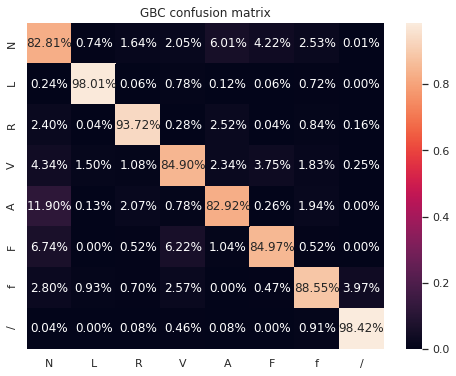

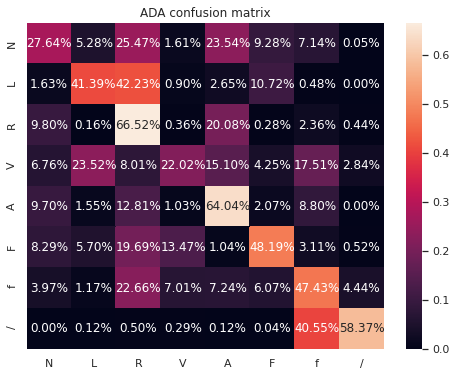

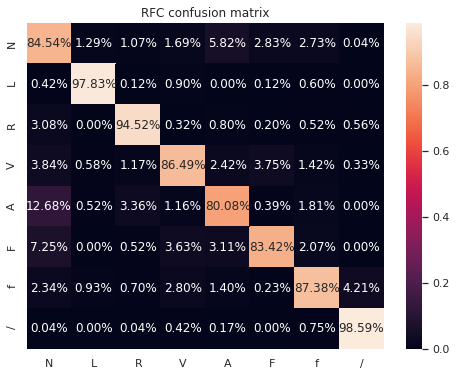

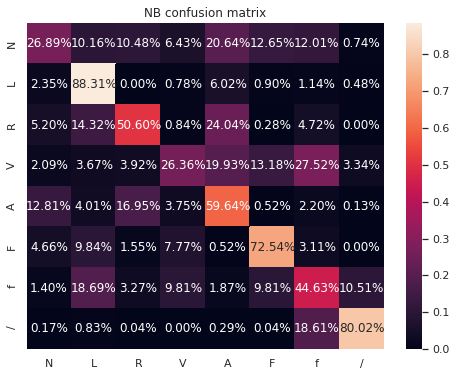

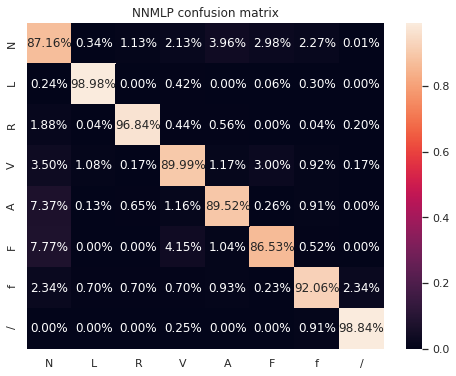

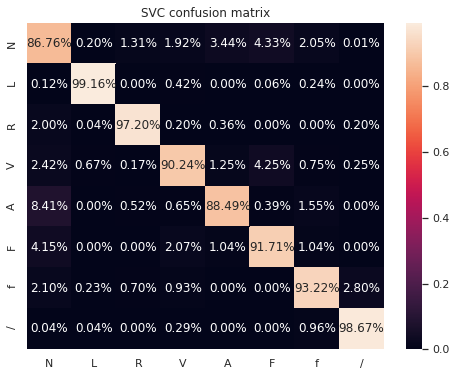

In [28]:
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

categories = ['N','L','R','V','A','F','f','/']

gbc_cf_m = confusion_matrix(y_test,y_pred_gbc)
gbc_cf_m = gbc_cf_m.astype('float')/ gbc_cf_m.sum(axis=1)[:,np.newaxis]
gbc_pr_s = precision_score(y_test,y_pred_gbc,average='weighted')

ada_cf_m = confusion_matrix(y_test,y_pred_ada)
ada_cf_m = ada_cf_m.astype('float')/ ada_cf_m.sum(axis=1)[:,np.newaxis]
ada_pr_s = precision_score(y_test,y_pred_ada,average='weighted')

rfc_cf_m = confusion_matrix(y_test,y_pred_rfc)
rfc_cf_m = rfc_cf_m.astype('float')/ rfc_cf_m.sum(axis=1)[:,np.newaxis]
rfc_pr_s = precision_score(y_test,y_pred_rfc,average='weighted')

NB_cf_m = confusion_matrix(y_test,y_pred_NB)
NB_cf_m = NB_cf_m.astype('float')/ NB_cf_m.sum(axis=1)[:,np.newaxis]
NB_pr_s = precision_score(y_test,y_pred_NB,average='weighted')

NNMLP_cf_m = confusion_matrix(y_test,y_pred_NNMLP)
NNMLP_cf_m = NNMLP_cf_m.astype('float')/ NNMLP_cf_m.sum(axis=1)[:,np.newaxis]
NNMLP_pr_s = precision_score(y_test,y_pred_NNMLP,average='weighted')

svc_cf_m = confusion_matrix(y_test,y_pred_svc)
svc_cf_m = svc_cf_m.astype('float')/ svc_cf_m.sum(axis=1)[:,np.newaxis]
svc_pr_s = precision_score(y_test,y_pred_svc,average='weighted')

plt.figure(figsize=(8,6))
sns.heatmap(gbc_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('GBC confusion matrix')
# plt.savefig('gbc_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(ada_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('ADA confusion matrix')
# plt.savefig('ada_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(rfc_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('RFC confusion matrix')
# plt.savefig('rfc_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(NB_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('NB confusion matrix')
# plt.savefig('NB_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(NNMLP_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('NNMLP confusion matrix')
# plt.savefig('NNMLP_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(svc_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('SVC confusion matrix')
# plt.savefig('SVC_cfm.jpeg')

In [ ]:
# def showResults(test, pred, model_name):
#     #target_names = ['positive', 'negative']
#     # print(classification_report(test, pred, target_names=target_names))
#     accuracy = accuracy_score(test, pred)
#     precision= precision_score(test, pred, average='weighted')
#     recall = recall_score(test, pred, average = 'weighted')
#     f1score= f1_score(test, pred, average='weighted') 
#     #loss=log_loss(test,pred)
#     print("Accuracy  : {}".format(accuracy))
#     print("Precision : {}".format(precision))
#     print("Recall : {}".format(recall))
#     print("f1score : {}".format(f1score))
#     #print("Loss : {}".format(loss))
#     cm=confusion_matrix(test, pred)
#     print(cm)
#     return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

In [40]:
exp_gbc = exp_gbc.sort_values(by=['feature'])
exp_gbc_corr = exp_gbc_corr.sort_values(by=['feature'])
exp_gbc_mis = exp_gbc_mis.sort_values(by=['feature'])

exp_gbc.to_csv('gbc_pfi.csv', encoding='utf-8', index=False)
exp_gbc_corr.to_csv('gbc_pfi_corr.csv', encoding='utf-8', index=False)
exp_gbc_mis.to_csv('gbc_pfi_mis.csv', encoding='utf-8', index=False)

exp_ada = exp_ada.sort_values(by=['feature'])
exp_ada_corr = exp_ada_corr.sort_values(by=['feature'])
exp_ada_mis = exp_ada_mis.sort_values(by=['feature'])

exp_ada.to_csv('ada_pfi.csv', encoding='utf-8', index=False)
exp_ada_corr.to_csv('ada_pfi_corr.csv', encoding='utf-8', index=False)
exp_ada_mis.to_csv('ada_pfi_mis.csv', encoding='utf-8', index=False)

exp_rfc = exp_rfc.sort_values(by=['feature'])
exp_rfc_corr = exp_rfc_corr.sort_values(by=['feature'])
exp_rfc_mis = exp_rfc_mis.sort_values(by=['feature'])

exp_rfc.to_csv('rfc_pfi.csv', encoding='utf-8', index=False)
exp_rfc_corr.to_csv('rfc_pfi_corr.csv', encoding='utf-8', index=False)
exp_rfc_mis.to_csv('rfc_pfi_mis.csv', encoding='utf-8', index=False)

exp_nb = exp_nb.sort_values(by=['feature'])
exp_nb_corr = exp_nb_corr.sort_values(by=['feature'])
exp_nb_mis = exp_nb_mis.sort_values(by=['feature'])

exp_nb.to_csv('nb_pfi.csv', encoding='utf-8', index=False)
exp_nb_corr.to_csv('nb_pfi_corr.csv', encoding='utf-8', index=False)
exp_nb_mis.to_csv('nb_pfi_mis.csv', encoding='utf-8', index=False)

exp_nnmlp = exp_nnmlp.sort_values(by=['feature'])
exp_nnmlp_corr = exp_nnmlp_corr.sort_values(by=['feature'])
exp_nnmlp_mis = exp_nnmlp_mis.sort_values(by=['feature'])

exp_nnmlp.to_csv('nnmlp_pfi.csv', encoding='utf-8', index=False)
exp_nnmlp_corr.to_csv('nnmlp_pfi_corr.csv', encoding='utf-8', index=False)
exp_nnmlp_mis.to_csv('nnmlp_pfi_mis.csv', encoding='utf-8', index=False)

exp_svc = exp_svc.sort_values(by=['feature'])
exp_svc_corr = exp_svc_corr.sort_values(by=['feature'])
exp_svc_mis = exp_svc_mis.sort_values(by=['feature'])

exp_svc.to_csv('svc_pfi.csv', encoding='utf-8', index=False)
exp_svc_corr.to_csv('svc_pfi_corr.csv', encoding='utf-8', index=False)
exp_svc_mis.to_csv('svc_pfi_mis.csv', encoding='utf-8', index=False)